Plotting Bible
mpl 3.5.2

# 1 - MATPLOTLIB

## set defaults, set style

In [17]:
# %matplotlib ipympl
# %matplotlib notebook # for jupyter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

# print(plt.rcParams)
plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend
plt.rc('figure', figsize=(4,1))
plt.style.available
plt.style.use('seaborn-white')

# TEXTUAL INFORMATION, LABELS, AXIS, LEGEND

## zip and unpacking- tuples to separate x and y lists

In [53]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
# fig,ax = plt.subplots()

coordinates = [(1, 1), (2, 3), (5, 10)]
print('unpack operator:')
print(*coordinates)

print('unpack and zip:')
x, y = zip(*coordinates) 
print(x)
print(y)
print()

a = [1,2,3]
b = [3,4,5]
c = zip(a,b)
print(c)
print(list(c))



unpack operator:
(1, 1) (2, 3) (5, 10)
unpack and zip:
(1, 2, 5)
(1, 3, 10)

[(1, 3), (2, 4), (3, 5)]


## title, text, annotate, arrows, inset axes

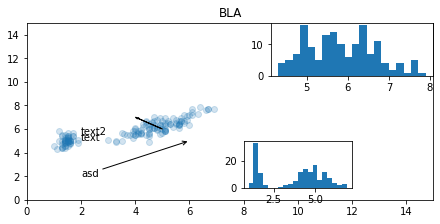

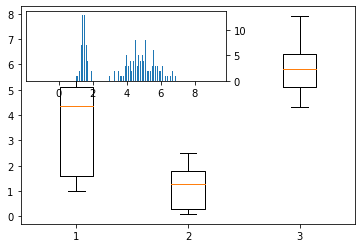

In [3]:
# %matplotlib ipympl
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris')


fig = plt.figure(figsize=(6,3),  constrained_layout=True)
ax = fig.gca()

ax.scatter(df['petal_length'],df['sepal_length'], alpha=0.2)
ax.set_ylim(0,15)
ax.set_xlim(0,15)
###############################


#### TEXT, ANNOTATE, ####
ax.annotate('text',(2,5))
ax.text(2,5.5,'text2')
ax.set_title('BLA')
#### TEXT, ANNOTATE, ####


#### ARROWS ####
ax.arrow(5,6,-1,1,width=0.001,head_width=0.1,length_includes_head=True,aa=True)
# this produces arrow with warped head. for unwarped hear use annotate
ax.annotate("asd", xy=(6, 5), xytext=(2, 2), arrowprops=dict(arrowstyle="->"))
#### ARROWS ####


#### INSET AXES ####
axinset = ax.inset_axes([8,1,4,4],transform=ax.transData) # use ax coordinates
axinset.hist(df['petal_length'], bins=20);

axinset2 = ax.inset_axes([0.6,0.7,0.4,0.3]) # use relative coords
axinset2.hist(df['sepal_length'], bins=20);
#### INSET AXES ####


#### INSET AXES USING HELPER ####
import mpl_toolkits.axes_grid1.inset_locator as mpl_il
plt.figure()
plt.boxplot([ df['petal_length'], df['petal_width'], df['sepal_length'] ], whis=1.5) # default is 1.5 (* IQR) 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='32%', loc=2)
ax2.hist(df['petal_length'], bins=100)
ax2.margins(x=0.5)
ax2.yaxis.tick_right()
#### INSET AXES USING HELPER ####




## table

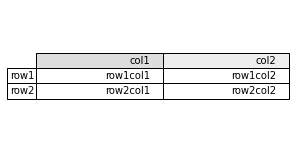

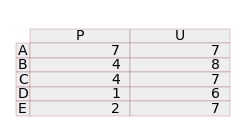

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = sns.load_dataset('iris')

fig = plt.figure(figsize=(4,2),  constrained_layout=True)
ax = fig.gca()

ax.table(   cellText=[['row1col1','row1col2'],['row2col1','row2col2']], 
            cellColours=None, 
            cellLoc='right', 
            colWidths=None, #[.2,.2], 
            rowLabels=['row1','row2'], 
            rowColours=None, 
            rowLoc='center', 
            colLabels=['col1','col2'], 
            colColours=['#ddd','#eee'], 
            colLoc='right', 
            loc='center', # if you didnt use bbox, then this will not span entire bbox size
            #bbox=[0,0,1,1], #None, if this is not none, it overrrides loc
            edges='closed')
ax.set_axis_off()



from matplotlib.table import table

fig, ax = plt.subplots(figsize=(4,2))

stats_table = table(ax, cellText=np.random.randint(1,9,(5,2)),
                  rowLabels=list("ABCDE"),
                  colLabels=list("PU"),
                  bbox = [0.1, 0, 0.9, 0.8])

for key, cell in stats_table.get_celld().items():
    cell.set_linewidth(.2)
    cell.set_edgecolor("#700")
    cell.set_facecolor("#eee")
    cell.set_fontsize(14)
ax.set_axis_off()

# Axes.table(cellText=None, cellColours=None, cellLoc='right', colWidths=None, rowLabels=None, rowColours=None, rowLoc='left', colLabels=None, colColours=None, colLoc='center', loc='bottom', bbox=None, edges='closed', **kwargs)
# For finer grained control over tables, use the Table class and add it to the axes with Axes.add_table.

## axis settings:
- x/ylabels, x/yticks, x/ylim, tick_params, rotate tick labels
- toggle visibility: set_axis_off/on, set_frame_on(False), .patch.set_visible(False)
- set_aspect
- yaxis_date
- fill_between, axhline, hlines, axhspan


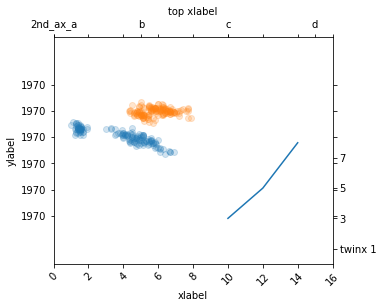

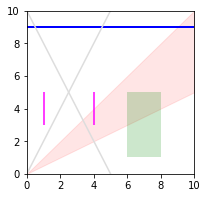

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
df = sns.load_dataset('iris')


fig, ax = plt.subplots(figsize=(5,5)) #figsize=(3,3), constrained_layout=True)
ax.scatter(df['petal_length'],df['sepal_length'], alpha=0.2)
ax.scatter(df['sepal_length'],df['sepal_width'], alpha=0.2)
ax.set_ylim(0,15)
ax.set_xlim(0,15)


#### SECONDARY AXIS ON TOP OR RIGHT ####
secax_x = ax.secondary_xaxis('top')
#### SECONDARY AXIS ON TOP OR RIGHT ####

#### OVERLAYING ANOTHER PLOT WITH DIFF AXIS ####
# twinx uses same x-axis but allows different y-axis
# automatixally uses right side for new y-axis
ax2 = ax.twinx()
ax2.plot([10,12,14],[3,5,8])
ax2.set_yticks([1,3,5,7], labels=['twinx 1','3','5','7'])
ax2.set_axis_on()
ax2.set_ylim(0,15)


#### AXIS LABELS ####
ax.get_ylabel()
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')
secax_x.set_xlabel('top xlabel')
#### AXIS LABELS ####


#### AXIS LIMITS ####
ax.get_ylim()
ax.set_xlim(0,15)
#### AXIS LIMITS ####


#### SET TICKS AND TICKLABELS ####
#### discouraged method of hardcoding ticks ####
# any of these work
ax.set_yticks(list(np.arange(0,16,3)))
ax.xaxis.set_ticks([0,2,4,6,8,10,12,14,16],) # ([], labels=None, minor=False )
secax_x.set_ticks([0,5,10,15], labels=['2nd_ax_a','b','c','d'], minor=False )

ax.tick_params(axis='both', labelleft=1, labelbottom=1, bottom=1, top=1, left=1, right=1)
#### SECONDARY AXIS (WITH FUNCTION CONVERTER) ####
# see docs. you can have original axis in degrees, 2nd axis show radians
# or orig axis shows numbers, 2nd axis shows inverse e.g. 1, 10, 100 > 1, 1/10, 1/100


#### ROTATE TICK LABELS ####
for item in ax.xaxis.get_ticklabels():
    item.set_rotation(45)

# extend bottom space for long label texts
plt.subplots_adjust(bottom=0.25)
#### ROTATE TICK LABELS ####


#### TOGGLE ENTIRE AXIS, LABELS, TICKS ####
ax.set_axis_off()
ax.set_axis_on()
#### TOGGLE ENTIRE AXIS, LABELS, TICKS ####


#### TOGGLE BORDER LINES ####
ax.set_frame_on(False)
secax_x.set_frame_on(False)
#### TOGGLE BORDER LINES ####
 

#### FLIP ####
ax.invert_yaxis()
#### FLIP ####


#### ASPECT ####
ax.set_aspect(0.5)


#### DATE ####
ax.yaxis_date(tz='UTC')


#### if you overlay multiple axes on the same space, 
# this makes the fill disappear, otherwise  the new one blocks the old one
ax.patch.set_visible(False)


# ax.have_units()
# ax.convert_xunits(0)

# plt.close(fig=fig)
fig4, ax4 = plt.subplots(figsize=(3,3))
ax4.set_xlim(0,10)
ax4.set_ylim(0,10)

x = np.arange(0,11,2)
y1 = np.arange(0,11,2)
y2 = np.arange(0,6,1)

ax4.fill_between(x,y1,y2, color='red', alpha=0.1)

# SINGLE HORI/VERT LINE, SET LIMITS IF YOU WANT
ax4.axhline(9, color="blue", lw=2) # xmin=0.05, xmax=0.95 

# MULTIPLE HORI/VERT LINE, MUST SET LIMITS
ax4.vlines(x=[1,4], ymin=3, ymax=5, color='magenta')

# SPAN AREA, MUST SET LIMITS
ax4.axvspan(xmin=6,xmax=8,ymin=0.1,ymax=0.5,color="#080", lw=0, alpha=0.2)  

# INFINITE LINE, DOES NOT NEED TO BE HORI/VERT
ax4.axline([0,0],[1,2], color="#ddd") # either give 2 coords,
ax4.axline([0,10],slope=-2, color="#ddd") # or give slope




## multiple plots on same axes 2nd example

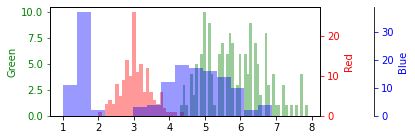

In [7]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(6,2))

axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')

axes[0].hist(df['sepal_length'], color=colors[0], alpha=0.4, bins=50)
axes[1].hist(df['sepal_width'] , color=colors[1], alpha=0.4, bins=25)
axes[2].hist(df['petal_length'], color=colors[2], alpha=0.4, bins=15)

for ax, color in zip(axes,colors):
    ax.set_ylabel('%s' % color, color=color)
    ax.tick_params(axis='y', colors=color)

plt.show()

## legends and bbox anchoring

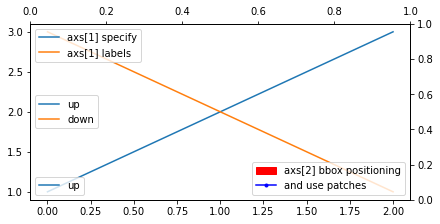

In [8]:
#### LEGENDS 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6,3),  constrained_layout=True)
axs = [ax, ax.twinx(), ax.twiny()]

line_up, = axs[0].plot([1, 2, 3], label='up')
line_down, = axs[0].plot([3, 2, 1], label='down')



#### LEGEND ####
# 2 legends for same ax
second_legend = axs[0].legend(handles=[line_up], loc='lower left')
axs[0].add_artist(second_legend)
axs[0].legend(handles=[line_up, line_down], loc='center left')
# 2 legends for same ax


# specifying labels as well.
axs[1].legend([line_up, line_down], ['axs[1] specify', 'axs[1] labels'], loc='upper left')


# positioning using bbox, and adding patches
# bbox_to_anchor sets the coordinate point, then use loc to decide which part of the legend anchors to that coordinate
red_patch = mpl.patches.Patch(color='red', label='axs[2] bbox positioning')
blue_line = mpl.lines.Line2D([], [], color='blue', marker='o', markersize=3, label='and use patches')
axs[2].legend(handles=[red_patch,blue_line],bbox_to_anchor=(1, 0), loc='lower right')
# if you use bbox 4 tuples, it makes an actual space per l,b,w,h , then locs anchor inside that space.
# axs[2].legend(handles=[red_patch,blue_line],bbox_to_anchor=(1, 0, 0.5, 0.5), loc='lower right')



# PLOT TYPES

## colorbar

Text(0, 1.05, 'too low')

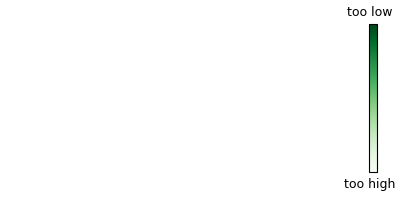

In [14]:
#### COLOR BAR LEGEND 
import matplotlib as mpl
import matplotlib.pyplot as plt


cmap = mpl.cm.Greens


#### see your plot and colorbar ####
# fig, ax = plt.subplots(figsize=(4,2), constrained_layout=True)
# # plot random item using cmap
# plot = ax.pcolor([[0,1],[0,1]], cmap=cmap)
# # ax.set_visible(False)
# cbar = fig.colorbar(plot, ax=ax, ticks=[])
# cbar.ax.set_position([0.9,0.3,0.03,0.43])
# cbar.ax.tick_params(axis='both', labelleft=1, labelbottom=1, bottom=1, top=0, left=0, right=0)
# cbar.ax.text(0, -0.11, 'too high', ha='center', fontsize=9)
# cbar.ax.text(0, 1.05, 'too low', ha='center', fontsize=9)


#### use a standalone ####
# I used this when i calculated cmap values for separate lineplots myself
fig, ax = plt.subplots(figsize=(4,2), constrained_layout=True)
# plot random item using cmap
plot = ax.pcolor([[0,1],[0,1]], cmap=cmap)
ax.set_visible(False)
cbar = fig.colorbar(plot, ax=ax, ticks=[])
cbar.ax.set_position([0.9,0.3,0.03,0.43])
cbar.ax.tick_params(axis='both', labelleft=1, labelbottom=1, bottom=1, top=0, left=0, right=0)
cbar.ax.text(0, -0.11, 'too high', ha='center', fontsize=9)
cbar.ax.text(0, 1.05, 'too low', ha='center', fontsize=9)

## make own cmaps

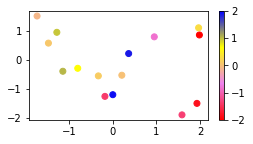

In [35]:
# Instead of a ListedColormap, which produces a discrete colormap, you may use a LinearSegmentedColormap. This can easily be created from a list using the from_list method.
# user wants a cmap with the range -2 to 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# make 3 lists of randoms 
x,y,c = zip(*np.random.rand(15,3)*4-2)


norm=plt.Normalize(-2,2)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","violet","yellow","blue"])

fig, ax = plt.subplots(figsize=(4,2))
plot = ax.scatter(x,y,c=c, cmap=cmap, norm=norm)
plt.colorbar(plot, ax=ax)
plt.show()


## bar (side by side, stacked), yerr,  barh

<BarContainer object of 4 artists>

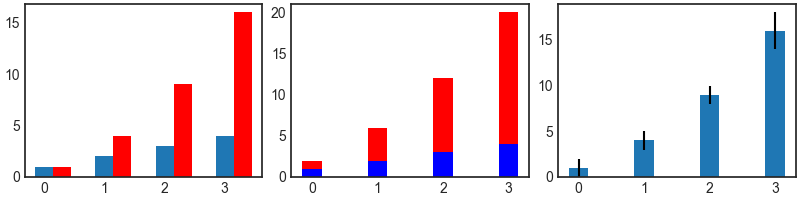

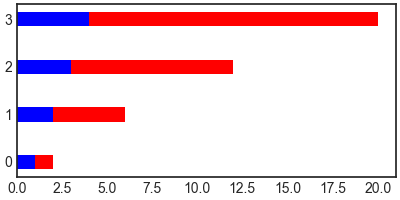

In [75]:
#### BAR CHARTS
linear_data = np.array([1,2,3,4])
exponential_data = linear_data**2

#### SIDE BY SIDE ####
fig,ax = plt.subplots(1,3, figsize=(8,2), constrained_layout=True)
xvals = range(len(linear_data))
ax[0].bar(xvals, linear_data, width = 0.3)
new_xvals = []
# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)
ax[0].bar(new_xvals, exponential_data, width = 0.3 ,color='red')
#### SIDE BY SIDE ####


#### STACKED BAR ####
xvals = range(len(linear_data))
ax[1].bar(xvals, linear_data, width = 0.3, color='b')
ax[1].bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')
#### STACKED BAR ####


#### Y ERRORS ####
from random import randint
linear_err = [randint(0,2) for x in range(len(linear_data))] 
ax[2].bar(xvals, exponential_data, width = 0.3, yerr=linear_err)
#### Y ERRORS ####

#### HORIZ BAR ####
fig, ax = plt.subplots(figsize=(4,2), constrained_layout=True)
xvals = range(len(linear_data))
ax.barh(xvals, linear_data, height = 0.3, color='b')
ax.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')
#### HORIZ BAR ####


## heatmaps

0.0 70.0


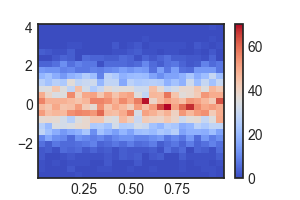

In [98]:
#### HEATMAP
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
cmap = mpl.cm.coolwarm

plt.figure(figsize=(3,2))
Y = np.random.normal(loc=0,  scale=1, size=10000)
X = np.random.random(size=10000)
heatmap = plt.hist2d(X,Y, bins=25, cmap=cmap)
print(np.min(heatmap[0]), np.max(heatmap[0]))

plt.colorbar()

## box and whiskers plot

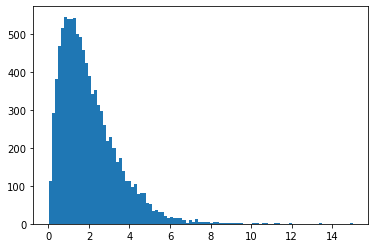

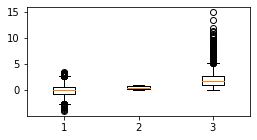

In [1]:
#### BOX AND WHISKERS ####
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df.describe()

# if you don't assign plt.hist to a temp variable that you don't care, by default mpl will return you a list of all the artists of that plot, which we don't care about
_ = plt.hist(df['gamma'], bins=100) 
# in jupyter you can also just plt.hist(...); end with semicolon to do the same.


plt.figure(figsize=(4,2))
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis=1.5)

# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis=1.5) # default is 1.5 (* IQR) 

# LAYOUTS

## subfigure

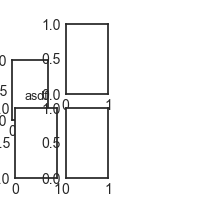

In [83]:
#### SUBFIGURES ####
fig = plt.figure(figsize=(2,2))
subfig = fig.subfigures(1,2, wspace=0, width_ratios=[0.6,0.4])

((ax1, ax2),(ax3,ax4)) = subfig[0].subplots(2,2)
ax3.set_title('asdf', fontsize=9)

ax1.set_position([0.1,0.4,0.3,0.3])

## gridspec

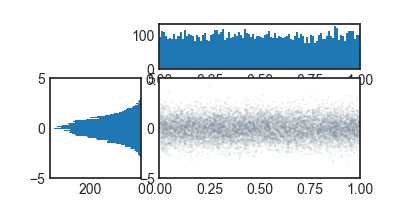

In [84]:
### aka make your own jointplot
### aka css flexbox

import matplotlib.gridspec as gridspec

plt.figure(figsize=(4,2))
gspec = gridspec.GridSpec(3,3)

top_hist    = plt.subplot(gspec[0,  1:])
side_hist   = plt.subplot(gspec[1:,  0])
lower_right = plt.subplot(gspec[1:, 1:])


Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

top_hist.hist(X, bins=100, orientation='horizontal', color='slateblue')
lower_right.scatter(X,Y, s=0.1, alpha=0.2, aa=True, color='slategrey')
s = side_hist.hist(Y, bins=100, orientation='horizontal', color='slateblue')

# clear the histograms and plot normed histograms
top_hist.clear()
top_hist.hist(X, bins=100, ) #normed=True)
side_hist.clear()
side_hist.hist(Y, bins=100, orientation='horizontal', ) #normed=True)
# flip the side histogram's x axis
side_hist.invert_xaxis()

# change axes limits
for ax in [top_hist, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_hist, lower_right]:
    ax.set_ylim(-5, 5)

## subplots

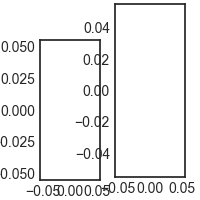

In [95]:
fig, ax = plt.subplots(1,2, figsize=(2,2), constrained_layout=True)
ax[0].plot()
ax[1].plot()
ax[0].set_position([0.2,0.1,0.3,0.7])


## subplot position calculator

ax[0,0].set_position([0.0500, 0.5600, 0.4450, 0.3900])
ax[0,1].set_position([0.5500, 0.5600, 0.4450, 0.3900])
ax[1,0].set_position([0.0500, 0.0600, 0.4450, 0.3900])
ax[1,1].set_position([0.5500, 0.0600, 0.4450, 0.3900])


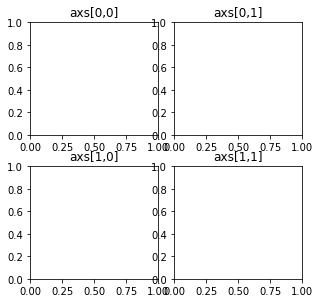

In [3]:
#### SUBPLOT POSITION CALCULATOR ####
# TODO: Set here
numrows = 2
numcols = 2

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4), constrained_layout=True)
axs = fig.subplots(numrows,numcols)

def layoutcalc(numrows,numcols,left=0.05,top=0.05,right=0.005,bottom=0.025,spacemultiplier=1.0):
    # LAYOUT CALCULATOR, returns set_position calculations
    # specify margin left bottom top right, or use defaults.

    left   = left   * spacemultiplier
    right  = right  * spacemultiplier
    top    = top    * spacemultiplier
    bottom = bottom * spacemultiplier

    cellheight = (1 / numrows) - (top + bottom)
    cellwidth = (1 / numcols) - (left + right)


    for i in range(numrows):
        curr_bottom = bottom + ((numrows-1)-i)*(top+cellheight+bottom)
        for j in range(numcols):
            curr_left = left + (j)*(left+cellwidth+right)
    
            print(f'ax[{i},{j}].set_position([{curr_left:.4f}, {curr_bottom:.4f}, {cellwidth:.4f}, {cellheight:.4f}])')
            axs[i,j].set_position([curr_left, curr_bottom, cellwidth, cellheight])
            axs[i,j].set_title(f'axs[{i},{j}]')

layoutcalc(numrows,numcols, left=0.05,top=0.05,right=0.005,bottom=0.06,spacemultiplier=1.0)

## twin plot (share x or y axis but overlay another plot)

(0.0, 15.0)

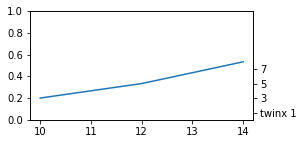

In [6]:
#### OVERLAYING ANOTHER PLOT WITH DIFF AXIS ####
# twinx uses same x-axis but allows different y-axis
# automatixally uses right side for new y-axis
fig, ax = plt.subplots(figsize=(4,2))

ax2 = ax.twinx()
ax2.plot([10,12,14],[3,5,8])
ax2.set_yticks([1,3,5,7], labels=['twinx 1','3','5','7'])
ax2.set_axis_on()
ax2.set_ylim(0,15)


# ANIMATION, INTERACTION

## funcanimation

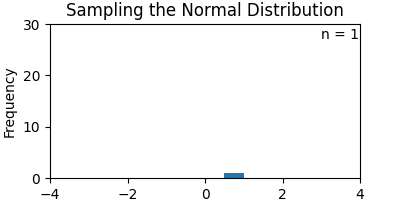

In [1]:
%matplotlib ipympl
import matplotlib.animation as animation
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

n = 100
x = np.random.randn(n)
curr = 0

def update(curr):
    if curr >= n:
        a.event_source.stop()
    plt.cla()
    bins = np.arange(-4,4,0.5) # ensure bins don't change
    plt.hist(x[:curr], bins=bins)
    plt.axis([-4,4,0,30]) # force axes to be static, otherwise may change
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

fig = plt.figure(figsize=(4,2))
a = animation.FuncAnimation(fig, update, init_func=update(1), interval=150) #interval in ms


## click

12

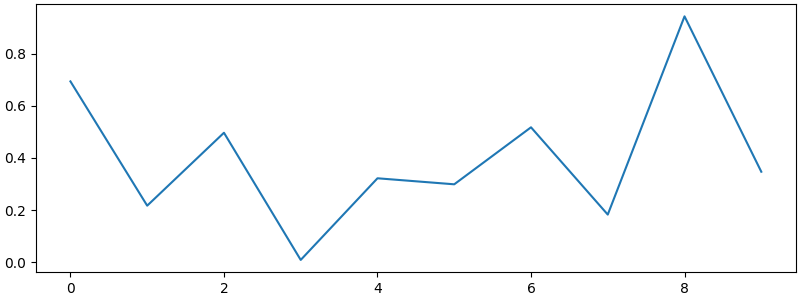

In [4]:
%matplotlib ipympl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8,3), constrained_layout=True)
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    if (event.xdata==None) :
        event.xdata = event.ydata = 0.
    plt.cla()
    plt.plot(data)
    # plt.gca().set_title('mouseclick {} {} {}data {} {}'.format(event.x, event.y, '\n', event.xdata, event.ydata), fontsize=10)
    plt.gca().set_title(f'mouseclick event at {event.x} {event.y} \ndata at {event.xdata:.2f} {event.ydata:.2f}', fontsize=10)
    plt.gcf().canvas.draw_idle()

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

## picker

12

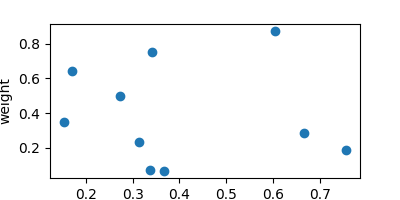

In [6]:
%matplotlib ipympl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']
shuffle(origins)
df = pd.DataFrame({
    'height' : np.random.rand(10),
    'weight' : np.random.rand(10),
    'origin' : origins,
})
plt.figure(figsize=(4,2))
plt.scatter(df['height'], df['weight'], picker=5) # mouse can be up to 5 pixels away from the object, and still be able to select it
plt.gca().set_ylabel('weight')
plt.gca().set_xlabel('height')
# plt.annotate('event.x')

def onpick(event):
    # this event is a pick event, which has different data than the mouse event.
    # it has an index value which happens to correspond to our index in the df.T
    # mpl is not aware of the df. but it just renders the data in the same order.
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('you selected: {}'.format(origin), fontsize=12)
    plt.gcf().canvas.draw_idle()


plt.gcf().canvas.mpl_connect('pick_event', onpick)

## slider

0

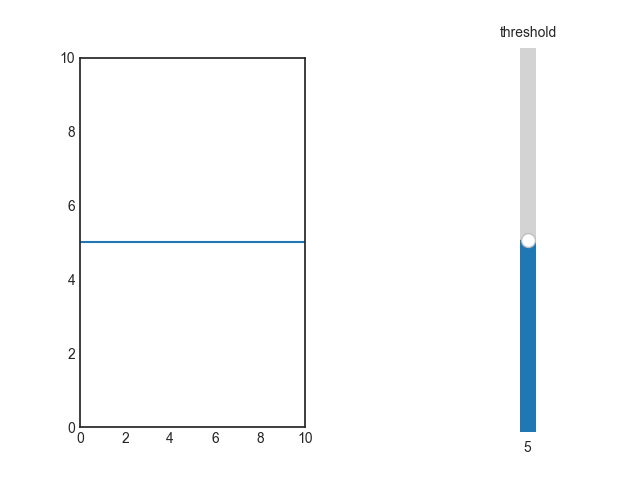

In [18]:
%matplotlib ipympl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider


fig, ax = plt.subplots(1,2)
y=5
ax[0].axhline(y)
ax[0].set_ylim(0,10)
ax[0].set_xlim(0,10)
ax[1].set_position([0.8,0.1,0.05,0.8])

## SLIDER CONTROLLER FOR HORIZONTAL RULE LINE
popslider=Slider(ax=ax[1],  label='threshold',  valmin=0,  valmax=10,  valinit=5, orientation='vertical', initcolor=None) # valstep=1, 


## UPDATE ##
def update(val):
    ## CLEAR PLOT. REDRAW BARS
    ax[0].cla()   
    ax[0].axhline(popslider.val)
    ax[0].set_ylim(0,10)
    ax[0].set_xlim(0,10)
    fig.canvas.draw_idle()
    # fig.canvas.draw()
## UPDATE ##


## ONCLICK ##
def onclick(event):
    ## IF USER CLICKS OUTSIDE OF PLOT, RETURN WITH NO ACTION
    if (event.xdata==None) :
        event.xdata = event.ydata = 0
        return
    ## SET SLIDER TO MATCH MOUSE YDATA VALUE, THAT WILL TRIGGER UPDATE
    popslider.set_val(event.ydata)
## ONCLICK ##




## RUN MAIN ##

plt.gcf().canvas.mpl_connect('button_press_event', onclick)
popslider.on_changed(update)
## RUN MAIN ##

# 2 - PANDAS PLOTS

## general plots

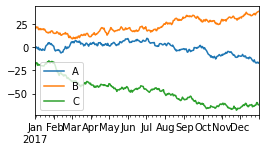

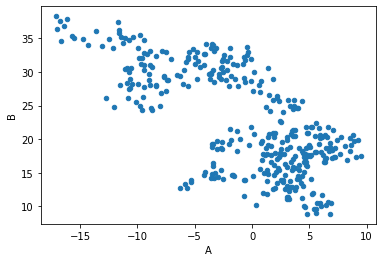

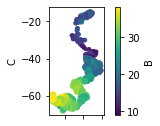

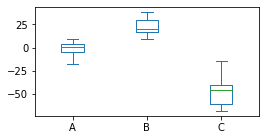

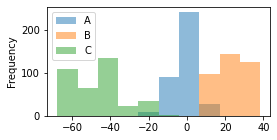

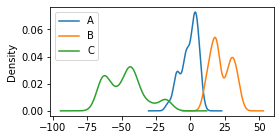

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(123)
df = pd.DataFrame({
    'A': np.random.randn(365).cumsum(0),
    'B': np.random.randn(365).cumsum(0) +20,
    'C': np.random.randn(365).cumsum(0) -20,},
    index=pd.date_range('1/1/2017', periods=365))
df.head()


# fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))

df.plot(figsize=(4,2));

df.plot('A', 'B', kind='scatter'); # jupyter trick to suppress text output/warnings

ax = df.plot.scatter('A','C', c='B', s=df['B'], colormap='viridis', figsize=(4,2))
ax.set_aspect('equal') # makes the axes scales equal

df.plot.box(figsize=(4,2));

df.plot.hist(alpha=0.5, figsize=(4,2));

df.plot.kde(figsize=(4,2));


## pd.plotting.scatter_matrix()

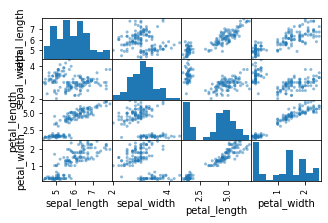

In [14]:
# for large dataset
# for high-dimensional multivariate data

import seaborn as sns
iris = sns.load_dataset('iris')

pd.plotting.scatter_matrix(iris, figsize=(5,3));
# this is useful, quickly lets you see there might be some clustering.

## pd.plotting.parallel_coordinates()

<AxesSubplot:>

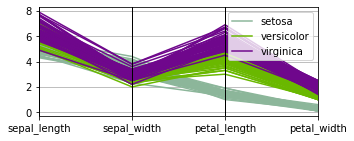

In [4]:
# for high-dim multivariate data
plt.figure(figsize=(5,2))
pd.plotting.parallel_coordinates(iris, 'species')
# you can observe that there is separation of clusters for petal_length and petal_width


# 3 - SEABORN

## hist, stacked hist, hist+kde

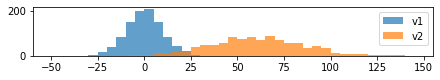

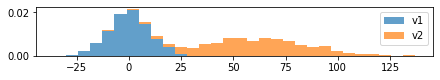

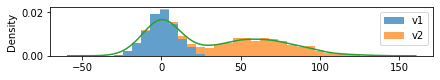

In [10]:
np.random.seed(1234)
v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

plt.figure(figsize=(6,1), constrained_layout=True)
plt.hist(v1,alpha=0.7,bins=np.arange(-50,150,5), label='v1');
plt.hist(v2,alpha=0.7,bins=np.arange(-50,150,5), label='v2');
plt.legend();


# STACKED
plt.figure(figsize=(6,1), constrained_layout=True)
plt.hist([v1,v2], histtype='barstacked', alpha=0.7, bins=30, density=True, label=['v1','v2']);
plt.legend();

# HIST + KDE
plt.figure(figsize=(6,1), constrained_layout=True)
plt.hist([v1,v2], histtype='barstacked', alpha=0.7, bins=30, density=True, label=['v1','v2']);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3)
plt.legend();

## distplot() (deprecated)

/Users/han/.pyenv/versions/3.9.7/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


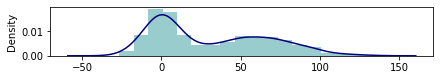

In [11]:
plt.figure(figsize=(6,1), constrained_layout=True)
sns.distplot(v3, hist_kws={'color':'Teal'}, kde_kws={'color': 'Navy'});

## jointplot(), jointplot(hexbin), jointplot(kde)

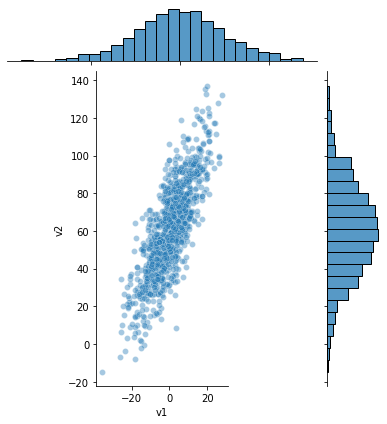

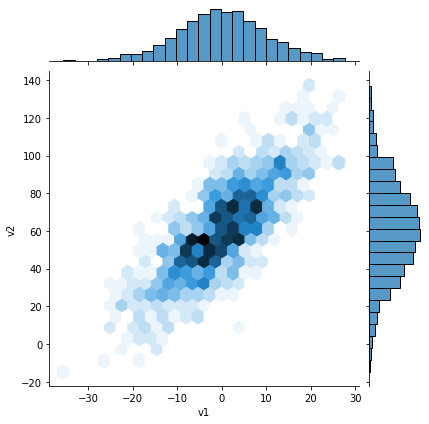

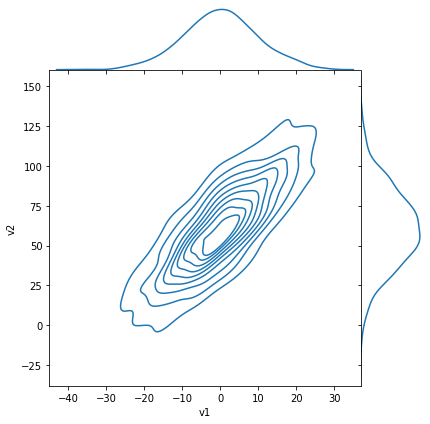

In [12]:
#### joint distribution plot
grid = sns.jointplot(x=v1,y=v2, alpha=.4)
grid.ax_joint.set_aspect('equal')
# grid.ax_marg_x.set_aspect(0.2)

#### hexbin plot
# sort of a bivariate histogram, works well with large dataset
sns.jointplot(x=v1,y=v2, kind='hex')

#### continuous version of hexbin plot
sns.jointplot(x=v1,y=v2, kind='kde', space=0)


## pairplot(kde)

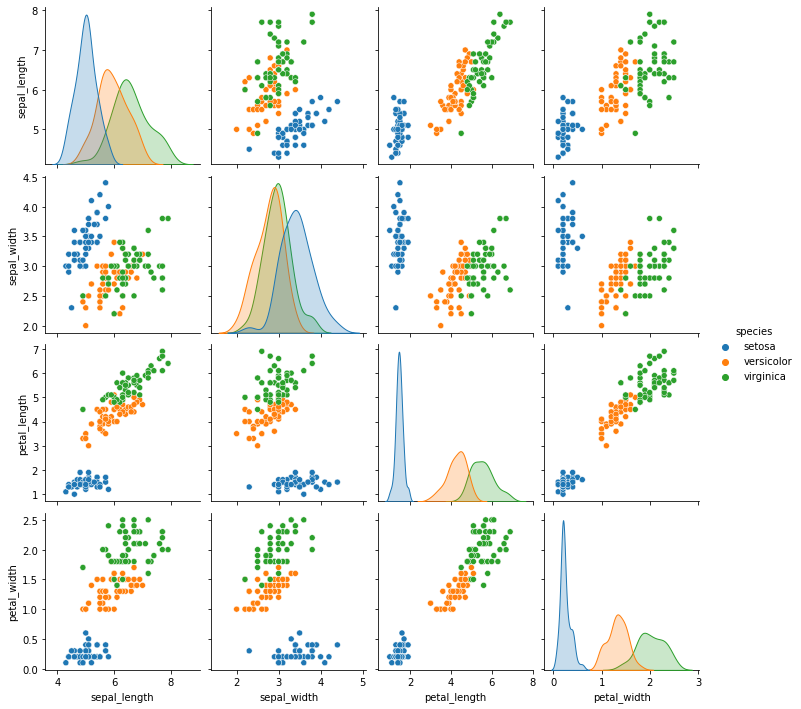

In [9]:
sns.pairplot(iris, hue='species', diag_kind='kde');

## swarmplot, violinplot

/Users/han/.pyenv/versions/3.9.7/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

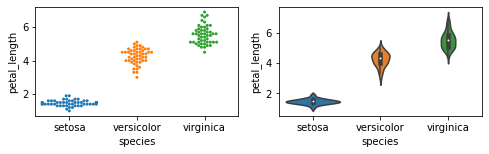

In [16]:
# swarmplot is like histogram
# violinplot is like boxplot but kde version. also conveys more information, such as multimodality

plt.figure(figsize=(8,2))
plt.subplot(121)
sns.swarmplot(x='species', y='petal_length', data=iris, s=3)
plt.subplot(122)
sns.violinplot(x='species', y='petal_length', data=iris)


# OTHERS

## geo mapping

In [3]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 4.3 MB/s eta 0:00:00


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import folium


lats = [1.370549,   1.370049,   1.404791] 
lons = [103.898500, 103.900615, 103.909000]

m = folium.Map(location=[np.mean(lats),np.mean(lons)], zoom_start=14)

for i in range(len(lats)):
    folium.CircleMarker(location=[lats[i],lons[i]], radius=10 ).add_to(m)

m

